In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data\20200327-WHO.csv')
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case
0,China,82078,117,3298,5,Local transmission,0
1,Republic of Korea,9332,91,139,8,Local transmission,0
2,Australia,2985,186,13,2,Local transmission,0
3,Malaysia,2031,235,23,4,Local transmission,0
4,Japan,1387,96,46,1,Local transmission,0
...,...,...,...,...,...,...,...
195,Guinea-Bissau,2,0,0,0,Imported cases only,1
196,Mali,2,0,0,0,Imported cases only,1
197,Réunion,135,41,0,0,Local transmission,0
198,Mayotte,50,15,0,0,Local transmission,0


In [2]:
death_rate = df['Total Deaths']/df['Total Confirmed']*100
df['Death Rate'] = death_rate
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
0,China,82078,117,3298,5,Local transmission,0,4.018129
1,Republic of Korea,9332,91,139,8,Local transmission,0,1.489498
2,Australia,2985,186,13,2,Local transmission,0,0.435511
3,Malaysia,2031,235,23,4,Local transmission,0,1.132447
4,Japan,1387,96,46,1,Local transmission,0,3.316510
...,...,...,...,...,...,...,...,...
195,Guinea-Bissau,2,0,0,0,Imported cases only,1,0.000000
196,Mali,2,0,0,0,Imported cases only,1,0.000000
197,Réunion,135,41,0,0,Local transmission,0,0.000000
198,Mayotte,50,15,0,0,Local transmission,0,0.000000


In [3]:
countries_infected = len(df)-1#minus 1 due the Diamond Princess cruiser/menos um devido ao cruzeiro Diamond Princess
print('The total number of countries infected is:',countries_infected)

The total number of countries infected is: 199


In [4]:
df = df.sort_values(by=['Death Rate'],ascending=False)

df[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
192,Zimbabwe,3,1,1,0,Imported cases only,0,33.333333
105,Sudan,3,0,1,0,Imported cases only,2,33.333333
136,Guyana,5,0,1,0,Local transmission,8,20.000000
183,Gabon,6,0,1,0,Imported cases only,4,16.666667
152,Curaçao,7,1,1,0,Imported cases only,0,14.285714
150,Cayman Islands,8,0,1,0,Imported cases only,1,12.500000
81,Bangladesh,48,9,5,1,Local transmission,0,10.416667
17,Italy,80539,6153,8165,660,Local transmission,0,10.137946
176,Niger,10,8,1,1,Imported cases only,0,10.000000
52,San Marino,218,10,21,0,Local transmission,0,9.633028


In [5]:
minimum_number_cases = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfMinNumCases = df[df['Total Confirmed'] > minimum_number_cases]
dfMinNumCases = dfMinNumCases.reset_index(drop=True)
dfMinNumCases.index = np.arange(1, (len(dfMinNumCases)+1))

dfMinNumCases[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
1,Italy,80539,6153,8165,660,Local transmission,0,10.137946
2,Iran,29406,2389,2234,157,Local transmission,0,7.597089
3,Spain,56188,8578,4089,655,Local transmission,0,7.277355
4,France,28786,3866,1695,364,Local transmission,0,5.888279
5,Netherlands,7431,1019,434,78,Local transmission,0,5.840398
6,The United Kingdom,11662,2129,578,115,Local transmission,0,4.956268
7,China,82078,117,3298,5,Local transmission,0,4.018129
8,Belgium,6235,1298,220,42,Local transmission,0,3.528468
9,Japan,1387,96,46,1,Local transmission,0,3.316510
10,Ecuador,1211,0,29,0,Local transmission,1,2.394715


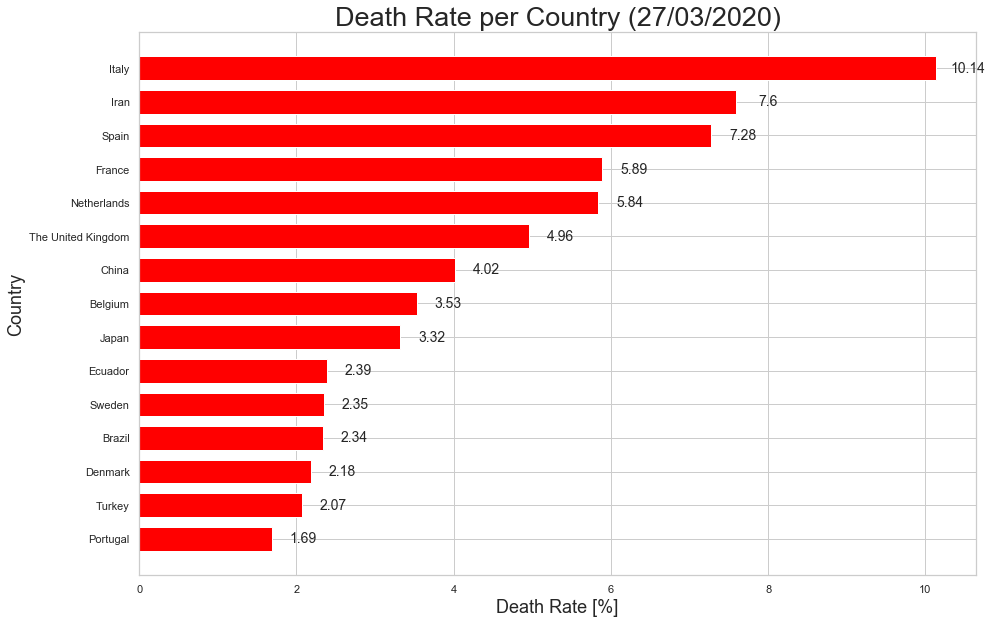

In [6]:
#matplotlib defaults
sns.set(style="whitegrid")
top15_deathrate = dfMinNumCases[0:15]
death_rate = top15_deathrate.round({'Death Rate':2})
death_rate = death_rate['Death Rate']


plt.figure(figsize=(15,10))
plt.barh(top15_deathrate['Country/Territory'],top15_deathrate['Death Rate'],height=0.7, color='red')
plt.title('Death Rate per Country (27/03/2020)',fontsize=27)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

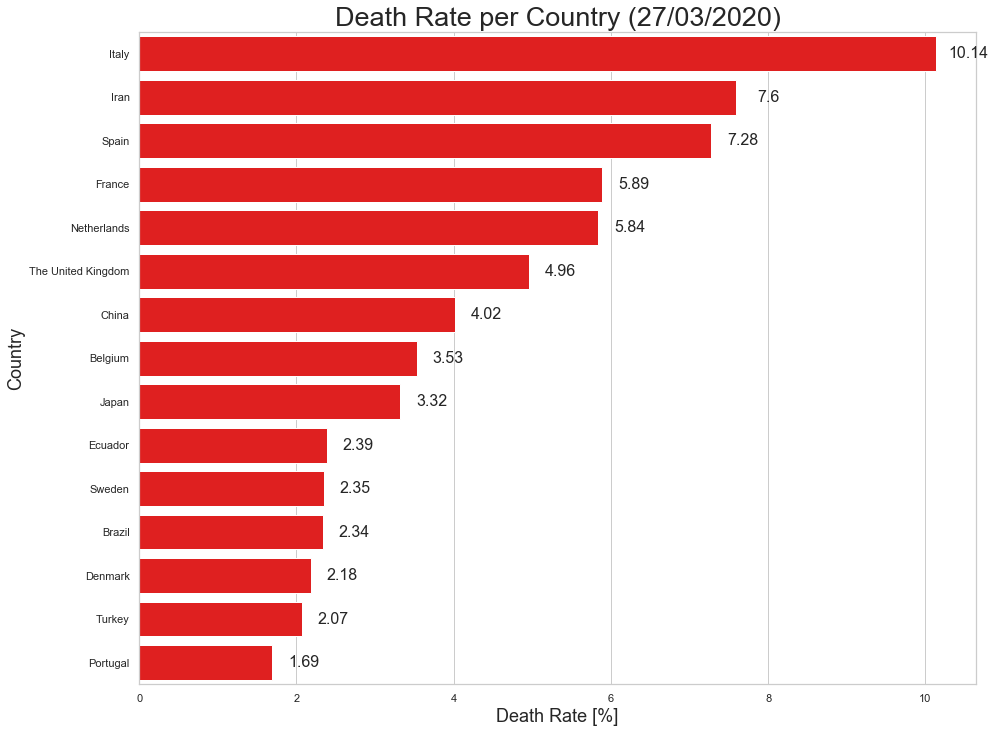

In [7]:
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Death Rate',y='Country/Territory', data=top15_deathrate ,
            label="Deaths", color="red")
plt.title('Death Rate per Country (27/03/2020)',fontsize=27)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200327_DeathRatePerCountry.png', bbox_inches='tight')
plt.show()


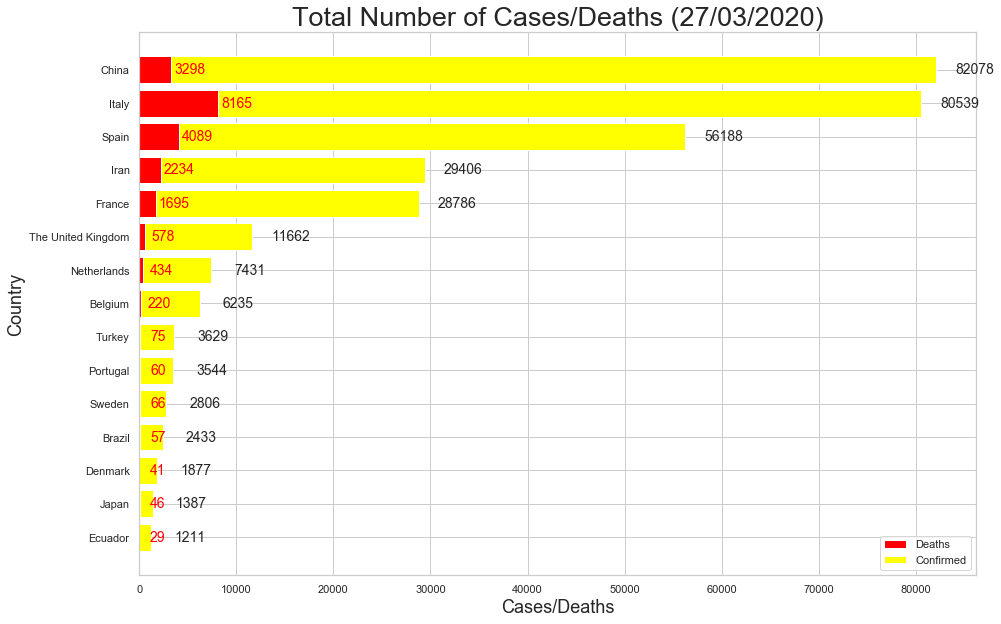

In [8]:
#matplotlib defaults
top15_confirmed = top15_deathrate.sort_values(by=['Total Confirmed'],ascending=False)
countries = np.array(top15_confirmed['Country/Territory'])
confirmed = np.array(top15_confirmed['Total Confirmed'])
deaths = np.array(top15_confirmed['Total Deaths'])
diference = confirmed - deaths

plt.figure(figsize=(15,10))
p1 = plt.barh(countries,deaths, color='red')
p2 = plt.barh(countries,diference,left=deaths, color='yellow')
plt.title('Total Number of Cases/Deaths (27/03/2020)',fontsize=27)
plt.xlabel('Cases/Deaths',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.legend((p1[0], p2[0]), ('Deaths', 'Confirmed'), loc='lower right')
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

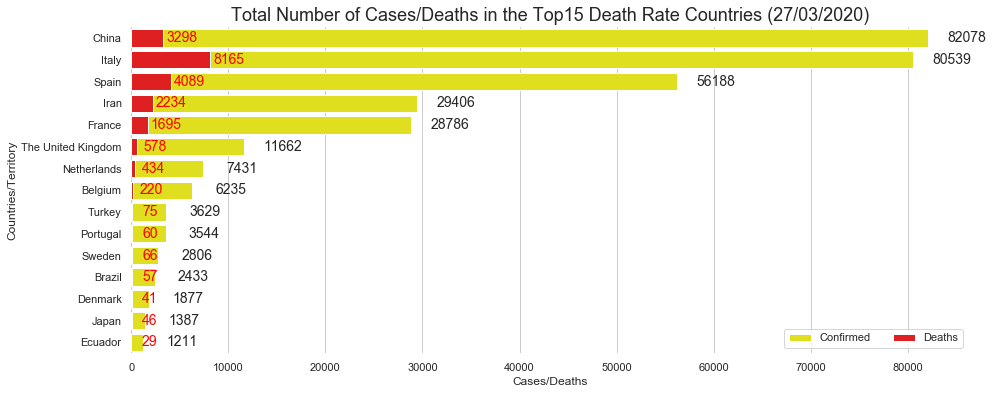

In [9]:
#seaborn defaults
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15_confirmed,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15_confirmed ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Death Rate Countries (27/03/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200327_TotalNumberCasesDeaths.png', bbox_inches='tight')

In [10]:
dfDSLRC = df.sort_values(by=['Days since last reported case'],ascending=False)#dfDSLRC = dataframe Days since last reported case
dfDSLRC[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
142,Saint Vincent and the Grenadines,1,0,0,0,Imported cases only,14,0.000000
82,Maldives,13,0,0,0,Local transmission,11,0.000000
153,Saint Barthélemy,3,0,0,0,Under investigation,11,0.000000
199,conveyance,712,0,7,0,Local transmission,11,0.983146
136,Guyana,5,0,1,0,Local transmission,8,20.000000
13,Papua New Guinea,1,0,0,0,Imported cases only,6,0.000000
86,Timor-Leste,1,0,0,0,Imported cases only,6,0.000000
188,Cabo Verde,3,0,0,0,Imported cases only,5,0.000000
180,Equatorial Guinea,6,0,0,0,Imported cases only,5,0.000000
189,Liberia,3,0,0,0,Local transmission,5,0.000000


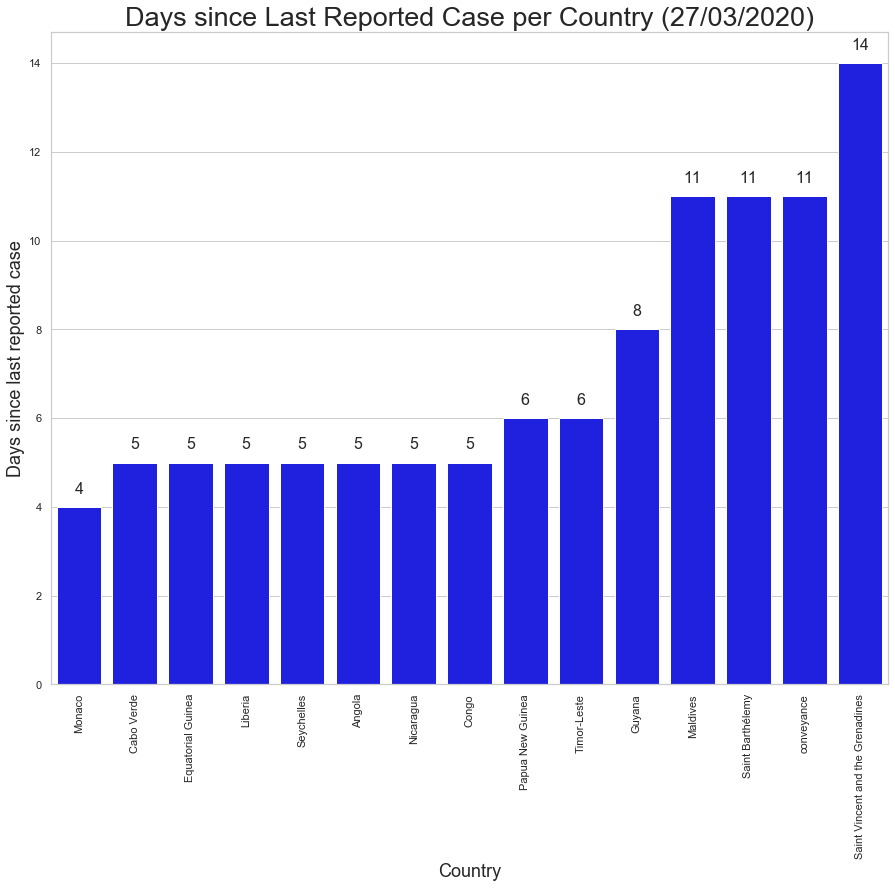

In [11]:
#seaborn defaults
top15DSLRC = dfDSLRC[0:15].sort_values(by=['Days since last reported case'])
DSLRC = top15DSLRC['Days since last reported case']

f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Country/Territory',y='Days since last reported case', data=top15DSLRC ,
            label="Days since last reported case", color="blue")
plt.title('Days since Last Reported Case per Country (27/03/2020)',fontsize=27)
plt.ylabel('Days since last reported case',fontsize=18)
plt.xlabel('Country',fontsize=18)
plt.xticks(rotation='vertical')
for i in range (0,15):
    plt.text(x=i, y=DSLRC.iloc[i]+0.4 , s=DSLRC.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200327_DaysSinceLast.png', bbox_inches='tight')
plt.show()

In [12]:
Transmission_type = pd.get_dummies(df, columns=['Transmission Classification'])
Transmission_type

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Days since last reported case,Death Rate,Transmission Classification_Imported cases only,Transmission Classification_Local transmission,Transmission Classification_Under investigation
192,Zimbabwe,3,1,1,0,0,33.333333,1,0,0
105,Sudan,3,0,1,0,2,33.333333,1,0,0
136,Guyana,5,0,1,0,8,20.000000,0,1,0
183,Gabon,6,0,1,0,4,16.666667,1,0,0
152,Curaçao,7,1,1,0,0,14.285714,1,0,0
...,...,...,...,...,...,...,...,...,...,...
121,Venezuela (Bolivarian\rRepublic of),91,0,0,0,1,0.000000,0,1,0
119,Uruguay,217,0,0,0,1,0.000000,1,0,0
49,Latvia,244,23,0,0,0,0.000000,0,1,0
51,Slovakia,226,10,0,0,0,0.000000,0,1,0


In [13]:
print('The number of countries with only imported cases is:',Transmission_type['Transmission Classification_Imported cases only'].sum())

The number of countries with only imported cases is: 57


In [14]:
print('The number of countries with local transmissions cases is:',Transmission_type['Transmission Classification_Local transmission'].sum())

The number of countries with local transmissions cases is: 139


In [15]:
print('The number of countries under investigation to determine the type of transmission is:',Transmission_type['Transmission Classification_Under investigation'].sum())

The number of countries under investigation to determine the type of transmission is: 4
